# 7 PDE
##### Boundary value problems

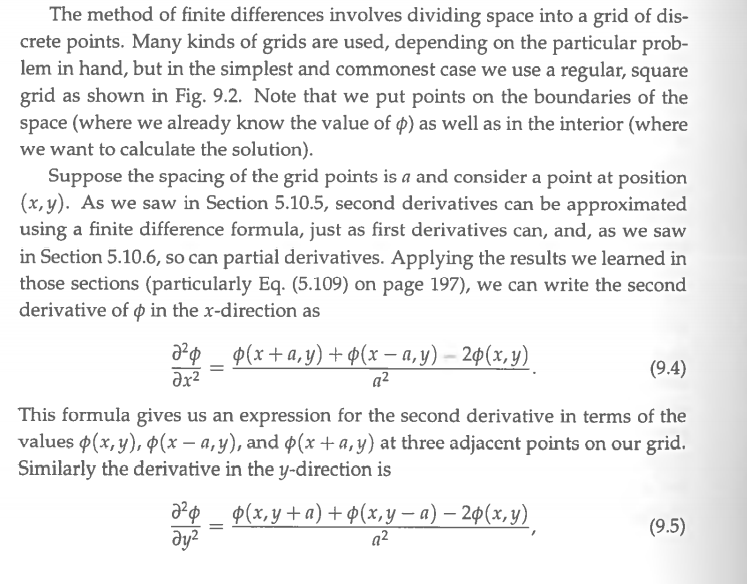

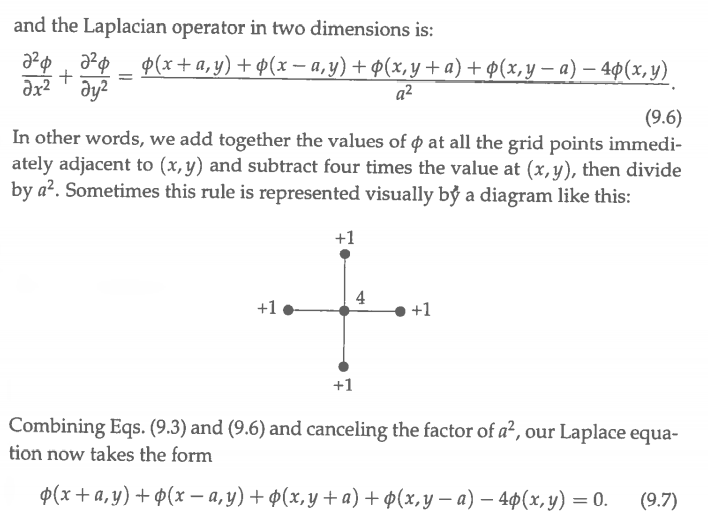
Then Laplace Equation is:

$\phi(x+a,y) + \phi(x-a,y) + \phi(x,y+a) + \phi(x,y-a) - 4 \phi(x,y) = 0$

WE can rea

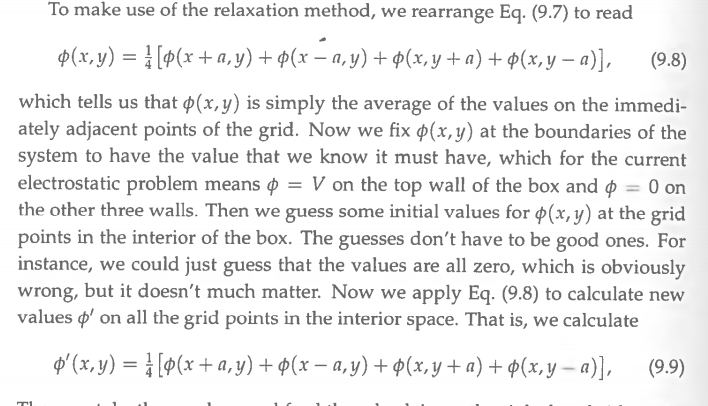

This method of Solving Laplace is called the Jacobi method 

__Example__

Let us compute a solution to the 2D electrostatics problem using the JAcobi method. For the case of a box 1m along each side, $V = 1V$ and the grid spacing 1cm. 

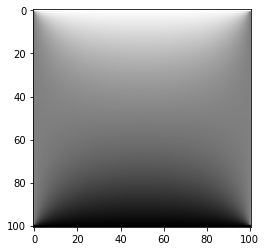

In [6]:
from numpy import empty,zeros,max
from pylab import imshow,gray,show

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-4   # Target accuracy

# Create arrays to hold potential values
phi = zeros([M+1,M+1],float)
phi[0,:] = V
phi[-1,:] = -V
phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
while delta>target:

    # Calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4

    # Calculate maximum difference from old values
    delta = max(abs(phi-phiprime))

    # Swap the two arrays around
    phi,phiprime = phiprime,phi

# Make a plot
imshow(phi)
gray()
show()

### Initial Value Problems

###### FTCS method

We have a PDE that depends on time and position. In this problems, we usually have an initial condition in $t=0$ and we cannot use the Relaxation method. <br>

For second derivatives, we have that: 

$ \dfrac{\partial^2 \phi}{\partial x^2} = \dfrac{ \phi(x+a,t) + \phi(x-a,t) - 2 \phi(x,t)}{a^2}$ <br>

Say we want to solve the __difussion equation__ $\dfrac{\partial \phi}{\partial t} = D \dfrac{\partial^2 \phi}{\partial x^2}$ <br>

Then, it becomes: <br>
$ \dfrac{d \phi}{d t} = \dfrac{D}{a^2} [ \phi(x+a,t) + \phi(x-a,t) - 2 \phi(x,t)]$ <br><br>

We use Euler's method, remember that it solves an equation of the form $d\phi / dt = f(\phi, t)$. <br>
In this case, after a time $h$ we can write $\phi(x, t+h) = \phi(x,t) + h \dfrac{D}{a^2} [ \phi(x+a,t) + \phi(x-a,t) - 2 \phi(x,t)]$ <br>

So that, if we know $\phi$ at every point at some time $t$, then this equation helps us find it at a time $t+h$

We have a 1cm thick container initially at a temperature of 20C. One extrem of it is placed at 0C and the other at 50C, while the intermediate are at 20C, find the solution. 

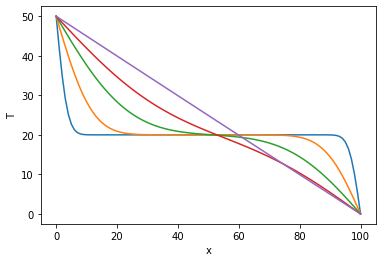

In [1]:
from numpy import empty
from pylab import plot,xlabel,ylabel,show

# Constants
L = 0.01      # Thickness of steel in meters
D = 4.25e-6   # Thermal diffusivity
N = 100       # Number of divisions in grid
a = L/N       # Grid spacing
h = 1e-4      # Time-step
epsilon = h/1000

Tlo = 0.0     # Low temperature in Celcius
Tmid = 20.0   # Intermediate temperature in Celcius
Thi = 50.0    # Hi temperature in Celcius

t1 = 0.01
t2 = 0.1
t3 = 0.4
t4 = 1.0
t5 = 10.0
tend = t5 + epsilon

# Create arrays
T = empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid
Tp = empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

# Main loop
t = 0.0
c = h*D/(a*a)
while t<tend:

    # Calculate the new values of T
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1]+T[i-1]-2*T[i])
    T,Tp = Tp,T
    t += h

    # Make plots at the given times
    if abs(t-t1)<epsilon:
        plot(T)
    if abs(t-t2)<epsilon:
        plot(T)
    if abs(t-t3)<epsilon:
        plot(T)
    if abs(t-t4)<epsilon:
        plot(T)
    if abs(t-t5)<epsilon:
        plot(T)


        
        
xlabel("x")
ylabel("T")
show()

Nevertheless, the method fails when applied to the heat equation